**PART B**

**(a)**
$$ 
\frac{\partial L}{\partial \overrightarrow W^{(1)}} =
  \begin{bmatrix}
  \frac{\partial L}{\partial w_{11}^1} & 
  \frac{\partial L}{\partial w_{12}^1} \\\\
  \
  \frac{\partial L}{\partial w_{21}^1} & 
  \frac{\partial L}{\partial w_{22}^1}
  \end{bmatrix}\\
$$\
$$ =
  \begin{bmatrix}
  ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y}) \, w_{11}^2 \, (1 - (h_{1}^1)^2) \, x_{1} &
  ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y}) \, w_{21}^2 \, (1 - (h_{2}^1)^2) \, x_{1} \\\\
  ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y}) \, w_{11}^2 \, (1 - (h_{1}^1)^2) \, x_{2} &
  ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y}) \, w_{21}^2 \, (1 - (h_{2}^1)^2) \, x_{2}
  \end{bmatrix}
$$\
$$ =
  \begin{bmatrix}
  ( \hat{y} - y ) \, w_{11}^2 \, (1 - (h_{1}^1)^2) \, x_{1} &
  ( \hat{y} - y ) \, w_{21}^2 \, (1 - (h_{2}^1)^2) \, x_{1} \\\\
  ( \hat{y} - y ) \, w_{11}^2 \, (1 - (h_{1}^1)^2) \, x_{2} &
  ( \hat{y} - y ) \, w_{21}^2 \, (1 - (h_{2}^1)^2) \, x_{2}
  \end{bmatrix}
$$
\
**(b)**
$$
\frac{\partial L}{\partial \overrightarrow w^{(2)}} =
  \begin{bmatrix}
  \frac{\partial L}{\partial w_{11}^2} \\\\
  \frac{\partial L}{\partial w_{21}^2}
  \end{bmatrix}\\
$$\
$$ =
  \begin{bmatrix}
  ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y}) \, h_{1}^1 \\\\
  ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y}) \, h_{2}^1 
  \end{bmatrix}
$$\
$$ =
  \begin{bmatrix}
  ( \hat{y} - y ) \, h_{1}^1 \\\\
  ( \hat{y} - y ) \, h_{2}^1 
  \end{bmatrix}
$$
\
**(c)**
$$
\frac{\partial L}{\partial \overrightarrow b^{(1)}} = 
  \begin{bmatrix}
  \frac{\partial L}{\partial b_{1}^1} \\\\
  \frac{\partial L}{\partial b_{2}^1}
  \end{bmatrix}\\
$$\
$$ =
  \begin{bmatrix}
  ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y}) \, w_{11}^2 \, (1 - (h_{1}^1)^2) \\\\
  ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y}) \, w_{21}^2 \, (1 - (h_{2}^1)^2)
  \end{bmatrix}\\
$$\
$$ =
  \begin{bmatrix}
  ( \hat{y} - y ) \, w_{11}^2 \, (1 - (h_{1}^1)^2) \\\\
  ( \hat{y} - y ) \, w_{21}^2 \, (1 - (h_{2}^1)^2)
  \end{bmatrix}\\
$$
\
**(d)**
$$
\frac{\partial L}{\partial b^{(2)}} = ( \frac{1- y}{1- \hat{y}} \, - \, \frac{y}{\hat{y}} ) \, \hat{y} \, (1 - \hat{y})
$$\
$$
= (\hat{y} - y)
$$

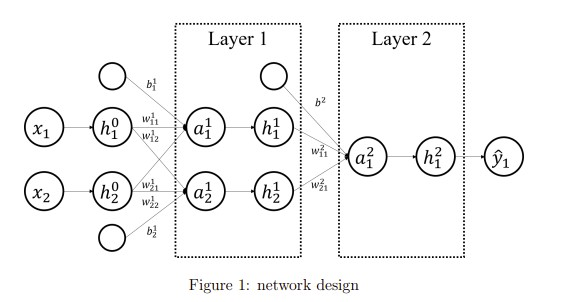

In [112]:
from IPython.display import Image

Image(filename='model.jpg') 

In [10]:

'''PART C'''

import numpy as np
import random

# input & output
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

# small constant
a = 0.01

# initial random weights and zeros bias
W1 = [[random.uniform(-1, 1), random.uniform(-1, 1)] , 
      [random.uniform(-1, 1), random.uniform(-1, 1)]]
w2 = [random.uniform(-1, 1), random.uniform(-1, 1)]
b1 = [0, 0]
b2 = [0]


# activation functions
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def d_sigmoid(z):
  return  z * (1 - z)

def d_tanh(z):
  return 1 - z**2


# loss function using binary cross entrophy
def L(y, y_pred):
  return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

def d_L(y, y_pred):
  return (1 - y)/(1 - y_pred) - y/y_pred


# a1 = W1*x + b1
def a11(x1, x2):
  return x1 * W1[0][0] + x2 * W1[1][0] + b1[0]

def a12(x1, x2):
  return x1 * W1[0][1] + x2 * W1[1][1] + b1[1]


# Backward propagation with gradient descent
def train(x1, x2, y):
  y_pred = predict(x1, x2)
  loss = L(y, y_pred)

  h11 = np.tanh(a11(x1, x2))
  h12 = np.tanh(a12(x1, x2))

  #dL_da21 = d_L(y, y_pred) * d_sigmoid(y_pred)
  dL_da21 = y_pred - y

  # updating weights
  d_w2_11 = dL_da21 * h11
  w2[0] = w2[0] - a * d_w2_11

  d_w2_21 = dL_da21 * h12
  w2[1] = w2[1] - a * d_w2_21

  d_w1_11 = dL_da21 * w2[0] * d_tanh(h11) * x1
  W1[0][0] = W1[0][0] - a * d_w1_11

  d_w1_12 = dL_da21 * w2[1] * d_tanh(h12) * x1
  W1[0][1] = W1[0][1] - a * d_w1_12

  d_w1_21 = dL_da21 * w2[0] * d_tanh(h11) * x2
  W1[1][0] = W1[1][0] - a * d_w1_21

  d_w1_22 = dL_da21 * w2[1] * d_tanh(h12) * x2
  W1[1][1] = W1[1][1] - a * d_w1_22

  # updating biases
  b2[0] = b2[0] - a * dL_da21

  d_b1_1 = dL_da21 * w2[0] * d_tanh(h11)
  b1[0] = b1[0] - a * d_b1_1

  d_b1_2 = dL_da21 * w2[1] * d_tanh(h12)
  b1[1] = b1[1] - a * d_b1_2


# predict output through the built model
def predict(x1, x2):
  h11 = np.tanh(a11(x1, x2))
  h12 = np.tanh(a12(x1, x2))

  # a2 = W2*h1 + b2
  a21 = h11 * w2[0] + h12 * w2[1] + b2[0]

  return sigmoid(a21)

def main():
  for epoch in range(5000):
    loss = 0
    for i in range(4):
      train(X[i][0], X[i][1], y[i])
      p = predict(X[i][0], X[i][1])
      loss += L(y[i], p)

    if epoch%500 == 0:
      print(loss)
  
  for i in range(4):
    result = predict(X[i][0], X[i][1])
    print("X = [" + str(X[i][0]) + ", " + str(X[i][1]) + "] : y =", y[i], 
          ", y_pred = {:.2f}".format(result))

main()

2.891100370432537
2.6534784174853026
2.398935951550647
2.151784654947472
1.875751529390538
1.1349057865044925
0.557348915549275
0.3321555104766273
0.22964016542382443
0.1734360697658951
X = [0, 0] : y = 0 , y_pred = 0.04
X = [0, 1] : y = 1 , y_pred = 0.98
X = [1, 0] : y = 1 , y_pred = 0.98
X = [1, 1] : y = 0 , y_pred = 0.05
